<a href="https://colab.research.google.com/github/Valentina-Gol/math_packages_leti/blob/main/math_package_lab1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Лабораторная работа №1

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

In [ ]:
from scipy.io import  wavfile
import scipy.io

sample_rate, data = wavfile.read('/content/drive/MyDrive/Colab_Notebooks/03-01-05-01-01-02-03_A3.wav')

## Загрузка аудио сигнала и построение огибающей кривой

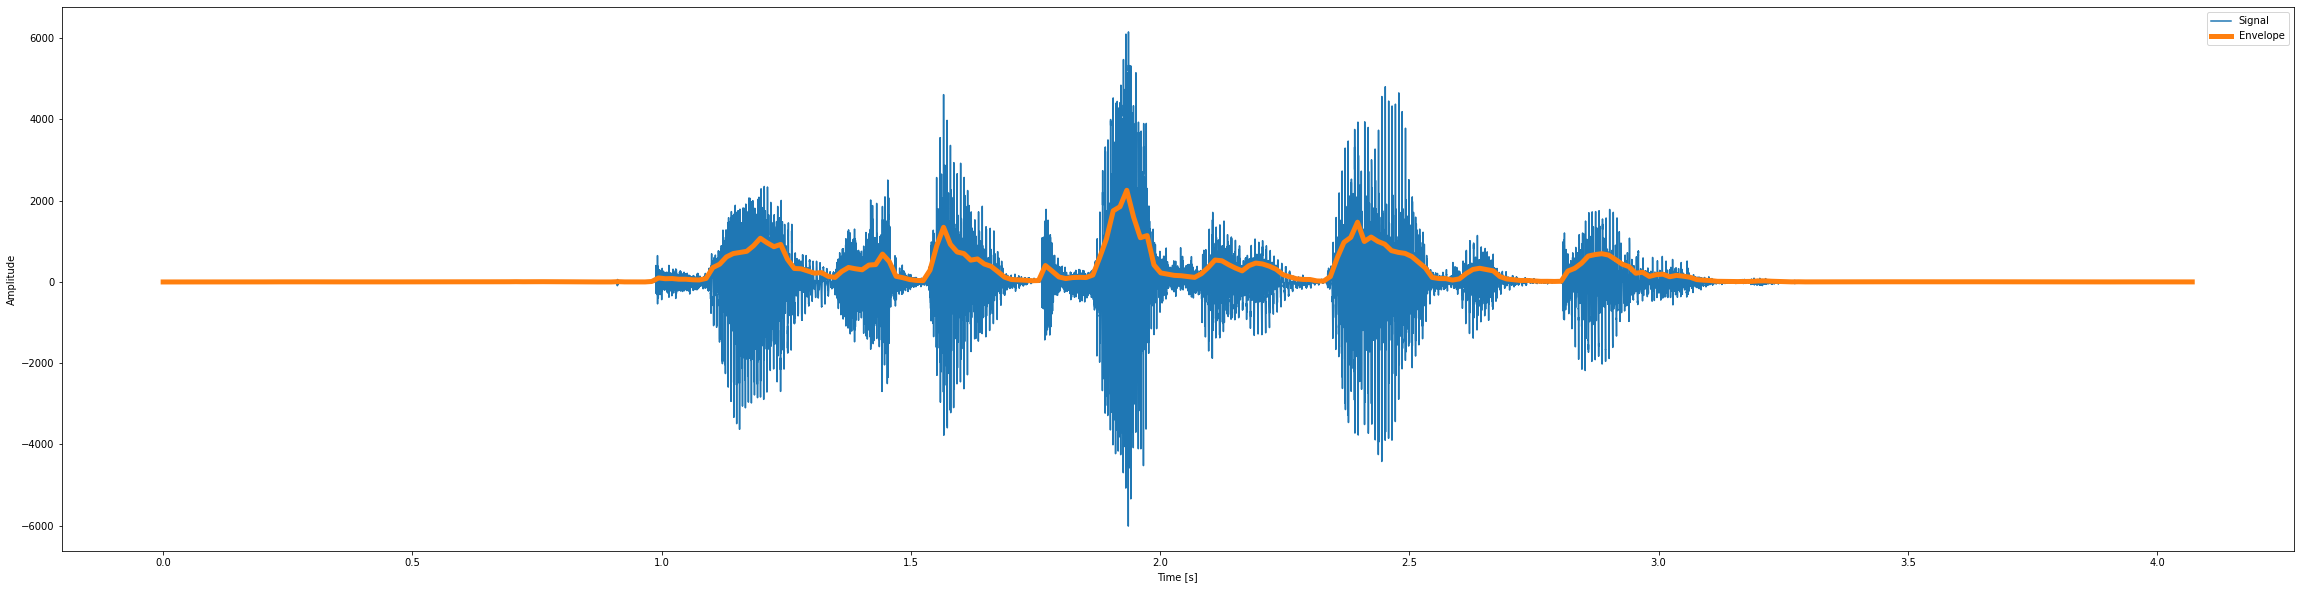

In [34]:
import matplotlib.pyplot as plt
import numpy as np

num_dots = 300
length_signal = data.shape[0] / sample_rate
time = np.linspace(0, length_signal, data.shape[0])

m = int(data.shape[0] / num_dots)
curve = np.linspace(0, length_signal, num_dots)
curve_values = []
for j in range(num_dots):
  sum = 0
  for k in range(m * j, m * j + m):
    sum += abs(data[k])
  curve_values.append(sum / m)
  
f = plt.figure()
f.set_figwidth(40)
f.set_figheight(10)
plt.plot(time, data, label="Signal")
plt.plot(curve, curve_values, label="Envelope", linewidth=5)
plt.legend()
plt.xlabel("Time [s]")
plt.ylabel("Amplitude")
plt.show()

## Фильтрация сигнала

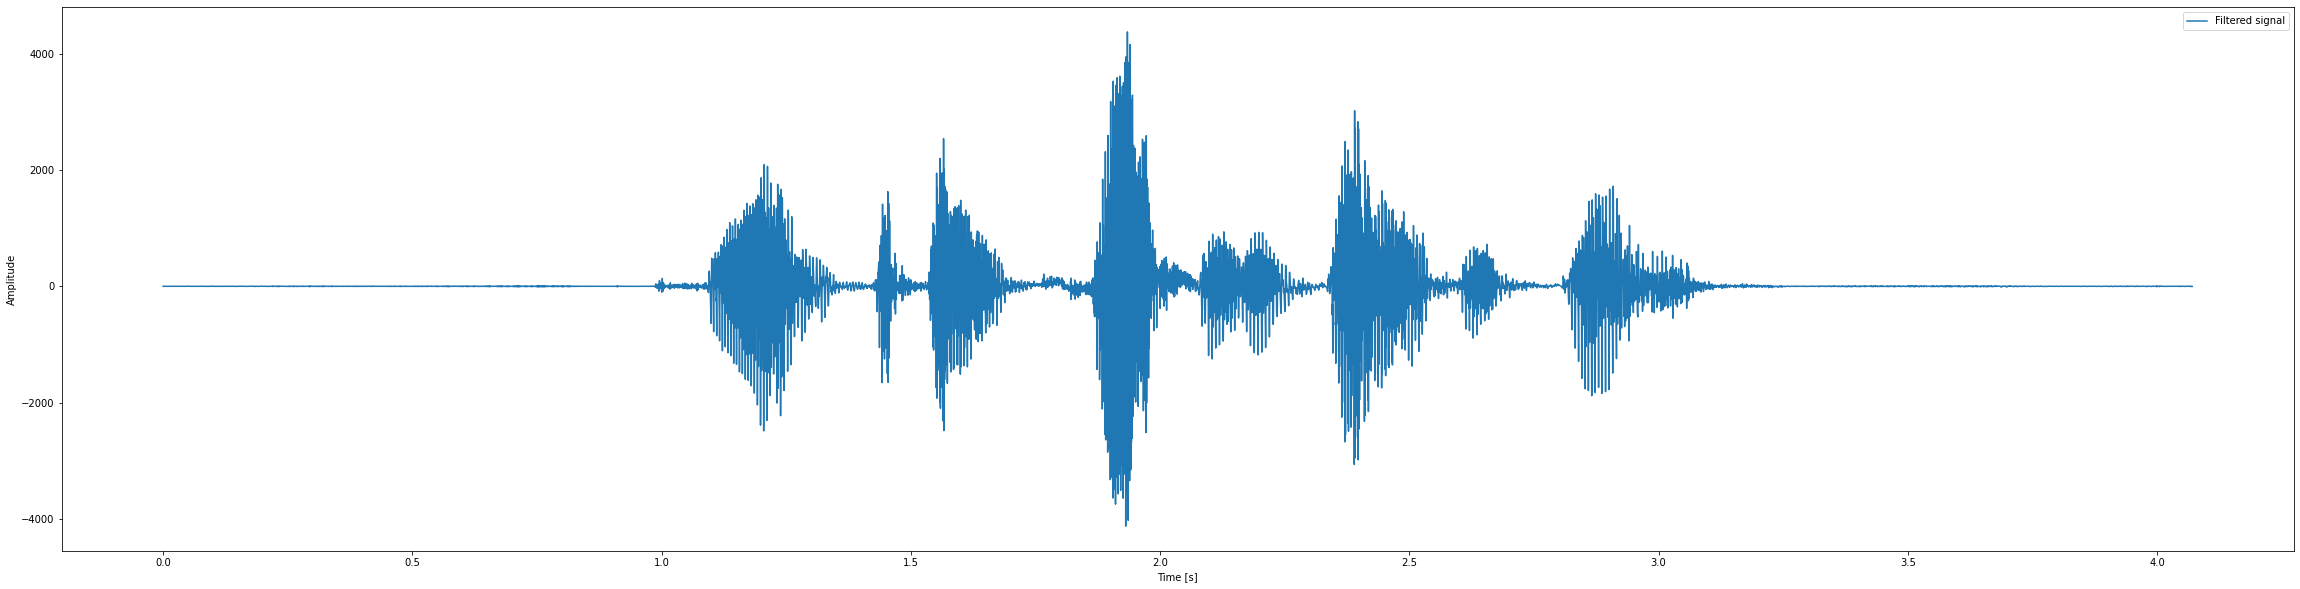

In [38]:
from scipy import signal

Fs = 1000
m = 10
wn = 2 * Fs / sample_rate

b, a = signal.butter(m, wn, 'lowpass')
filtered_data = signal.filtfilt(b, a, data)

f = plt.figure()
f.set_figwidth(40)
f.set_figheight(10)
plt.plot(time, filtered_data, label="Filtered signal")
plt.legend()
plt.xlabel("Time [s]")
plt.ylabel("Amplitude")
plt.show()

## Детектор сигнал/шум

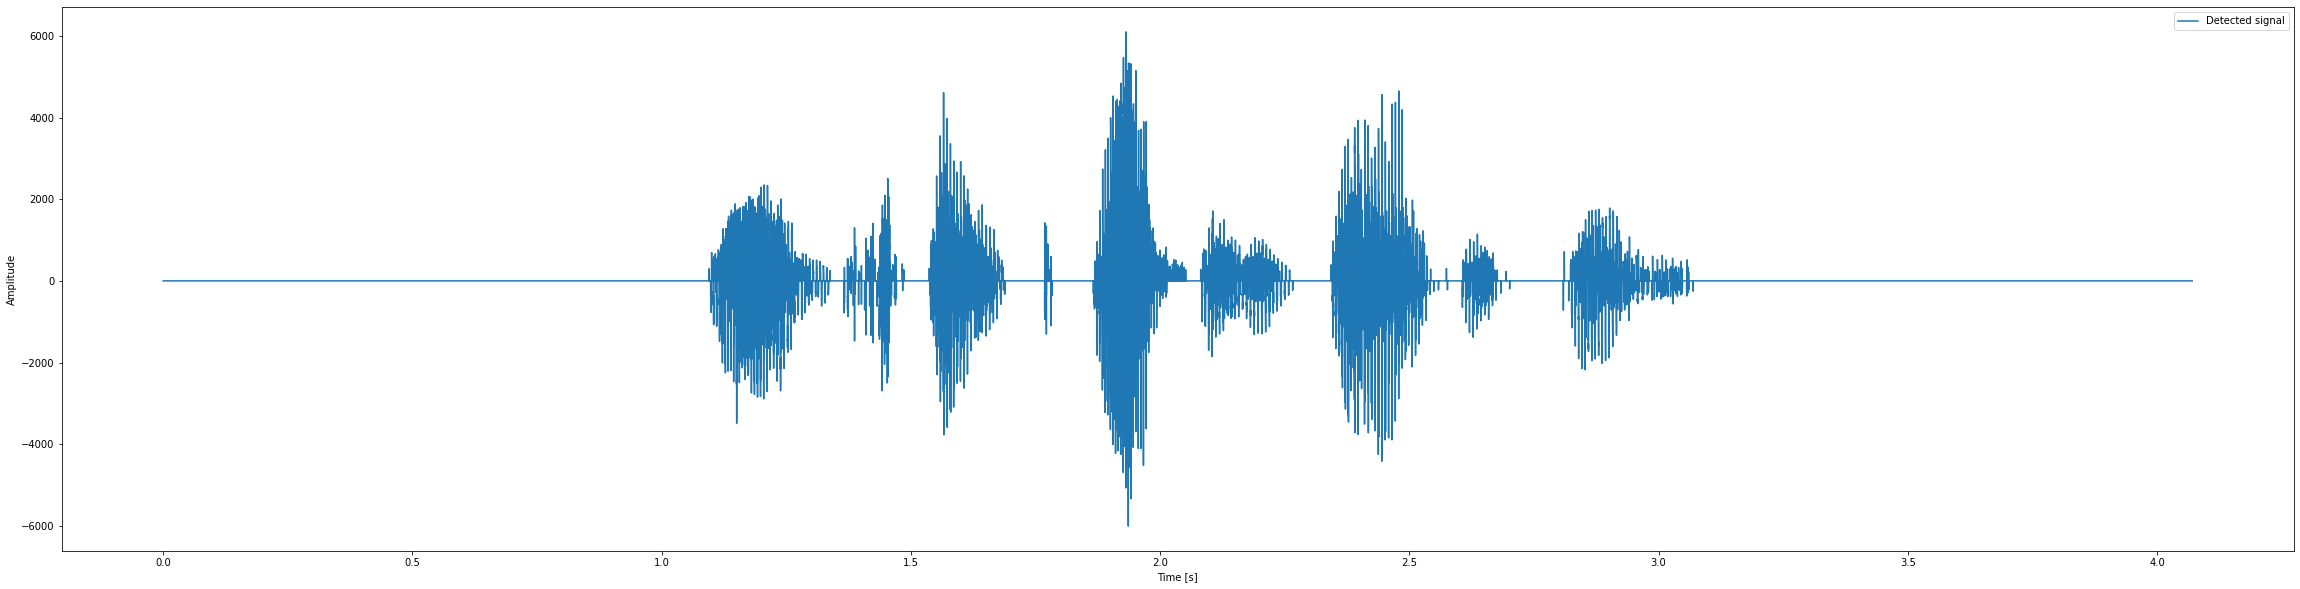

In [66]:
mid = 0
for k in range(data.shape[0]):
  mid += abs(data[k])
mid = mid / data.shape[0]
alpha = 0.9
Th = alpha * mid
k = 10

yi = np.zeros(data.shape[0])
is_signal = False
counter_signal = 0
counter_no_signal = 0

for ind in range(data.shape[0]):
  if abs(data[ind]) > Th:
    counter_signal += 1
    counter_no_signal = 0
    if counter_signal >= k:
      is_signal = True
      yi[ind] = data[ind]
  else:
    counter_no_signal += 1
    counter_signal = 0
    if counter_no_signal >= k:
      is_signal = False

f = plt.figure()
f.set_figwidth(40)
f.set_figheight(10)
plt.plot(time, yi, label="Detected signal")
plt.legend()
plt.xlabel("Time [s]")
plt.ylabel("Amplitude")
plt.show()